In [8]:
%pylab inline
import matplotlib.pyplot  as plt
import numpy 
from scipy import interpolate
import mdtraj as md
import sys,os
import seaborn as sbn
sbn.set_style("whitegrid")

import mdtraj as md

Populating the interactive namespace from numpy and matplotlib


In [9]:
#here create a 2D list for cyclohexane and water phase and fill it with the degrees
#a_cyc
a_cyc= [ [], [] ]
with open("dihedral_files/a_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        a_cyc[0].append(dih0)
        a_cyc[1].append(dih1)
        
#a_wat
a_wat= [ [], [] ]
with open("dihedral_files/a_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        a_wat[0].append(dih0)
        a_wat[1].append(dih1)

#c_cyc
c_cyc= [ [], [] ]
with open("dihedral_files/c_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        c_cyc[0].append(dih0)
        c_cyc[1].append(dih1)
        
#c_wat
c_wat= [ [], [] ]
with open("dihedral_files/c_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        c_wat[0].append(dih0)
        c_wat[1].append(dih1)        

#d_cyc
d_cyc= [ [], [] ]
with open("dihedral_files/d_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        d_cyc[0].append(dih0)
        d_cyc[1].append(dih1)
        
#d_wat
d_wat= [ [], [] ]
with open("dihedral_files/d_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        d_wat[0].append(dih0)
        d_wat[1].append(dih1)       
        
#e_cyc
e_cyc= [ [], [] ]
with open("dihedral_files/e_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        e_cyc[0].append(dih0)
        e_cyc[1].append(dih1)
        
#e_wat
e_wat= [ [], [] ]
with open("dihedral_files/e_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        e_wat[0].append(dih0)
        e_wat[1].append(dih1) 
        


In [10]:
#now gather all the values together and make a histogram to show the correct distribution of dihedrals
#http://stackoverflow.com/questions/5328556/histogram-matplotlib
a_cyc_hist,bins= numpy.histogram(a_cyc,bins=50)
width_a_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_a_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#a in water
a_wat_hist,bins= numpy.histogram(a_wat,bins=50)
width_a_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_a_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#c in cyc
c_cyc_hist,bins= numpy.histogram(c_cyc,bins=50)
width_c_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_c_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#c in water
c_wat_hist,bins= numpy.histogram(c_wat,bins=50)
width_c_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_c_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#d in cyc
d_cyc_hist,bins= numpy.histogram(d_cyc,bins=50)
width_d_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_d_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#d in water
d_wat_hist,bins= numpy.histogram(d_wat,bins=50)
width_d_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_d_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#e in cyc
e_cyc_hist,bins= numpy.histogram(e_cyc,bins=50)
width_e_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_e_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#e in water
e_wat_hist,bins= numpy.histogram(e_wat,bins=50)
width_e_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_e_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram



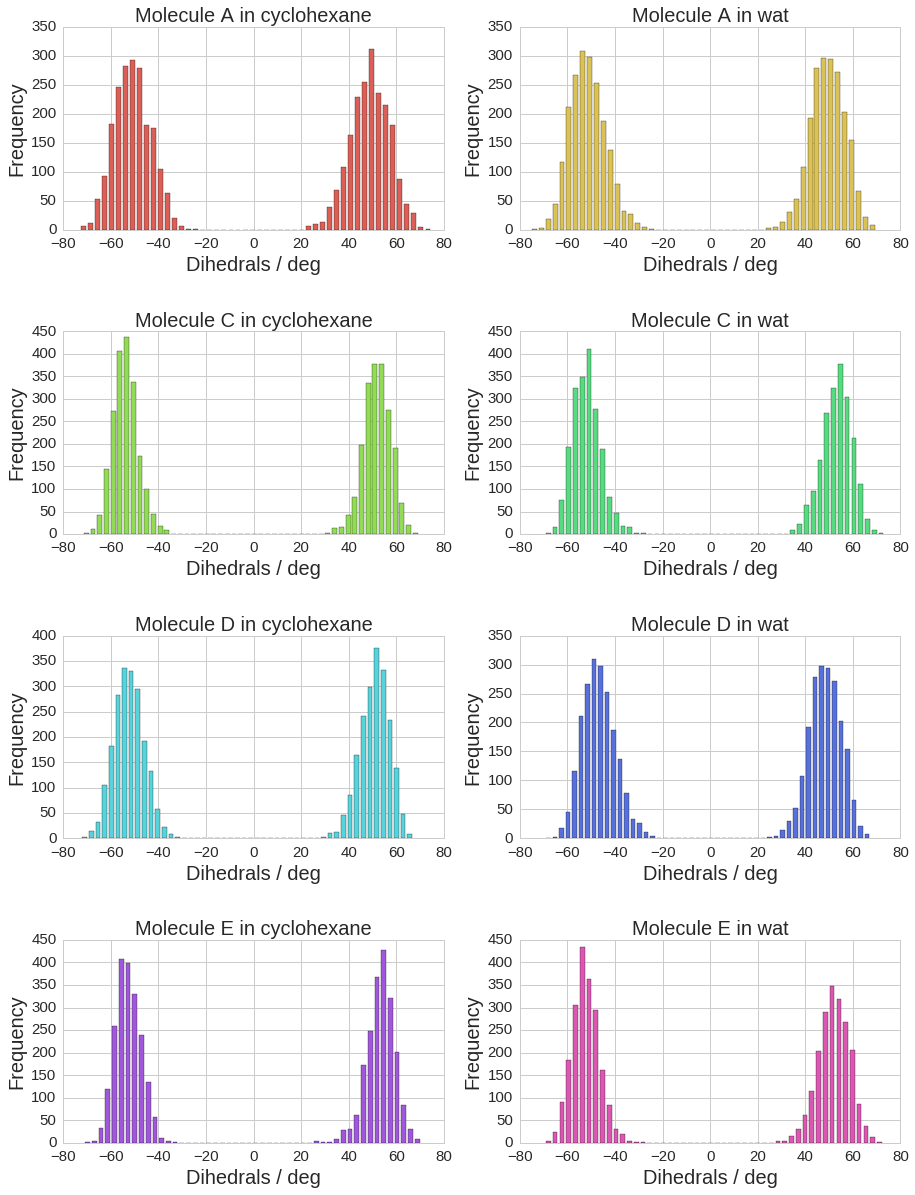

In [14]:
#http://stackoverflow.com/questions/5328556/histogram-matplotlib
colors =(sbn.color_palette("hls", 8))
#fix the xticks and yticks for all the plots to 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
#create a 4x2  subplot of 15"x20" dimension
fig,axarr = plt.subplots(4,2,figsize=(15,20))
#fix the space between subplots to .5"
fig.subplots_adjust(hspace=.5)

#a in cyc and water
axarr[0,0].bar(center_a_cyc,a_cyc_hist,align="center",width=width_a_cyc,color=colors[0])
axarr[0,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[0,0].set_ylabel("Frequency",fontsize=20)
axarr[0,0].set_title("Molecule A in cyclohexane",fontsize=20)
axarr[0,1].bar(center_a_wat,a_wat_hist,align="center",width=width_a_cyc,color=colors[1])
axarr[0,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[0,1].set_ylabel("Frequency",fontsize=20)
axarr[0,1].set_title("Molecule A in wat",fontsize=20)
#c in cyc and water
axarr[1,0].bar(center_c_cyc,c_cyc_hist,align="center",width=width_a_cyc,color=colors[2])
axarr[1,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[1,0].set_ylabel("Frequency",fontsize=20)
axarr[1,0].set_title("Molecule C in cyclohexane",fontsize=20)
axarr[1,1].bar(center_c_wat,c_wat_hist,align="center",width=width_c_cyc,color=colors[3])
axarr[1,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[1,1].set_ylabel("Frequency",fontsize=20)
axarr[1,1].set_title("Molecule C in wat",fontsize=20)
#d in cyc and water
axarr[2,0].bar(center_d_cyc,d_cyc_hist,align="center",width=width_d_cyc,color=colors[4])
axarr[2,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[2,0].set_ylabel("Frequency",fontsize=20)
axarr[2,0].set_title("Molecule D in cyclohexane",fontsize=20)
axarr[2,1].bar(center_d_wat,a_wat_hist,align="center",width=width_d_cyc,color=colors[5])
axarr[2,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[2,1].set_ylabel("Frequency",fontsize=20)
axarr[2,1].set_title("Molecule D in wat",fontsize=20)
#e in cyc and water
axarr[3,0].bar(center_e_cyc,e_cyc_hist,align="center",width=width_e_cyc,color=colors[6])
axarr[3,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[3,0].set_ylabel("Frequency",fontsize=20)
axarr[3,0].set_title("Molecule E in cyclohexane",fontsize=20)
axarr[3,1].bar(center_e_wat,e_wat_hist,align="center",width=width_e_cyc,color=colors[7])
axarr[3,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[3,1].set_ylabel("Frequency",fontsize=20)
axarr[3,1].set_title("Molecule E in wat",fontsize=20)
plt.show()
fig.tight_layout()

fig.savefig("Chair_conf_distribution.png",transparent=True,dpi=300)